c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

Silhouette Score (KMeans): 0.551
Silhouette Score (Agglomerative): 0.552


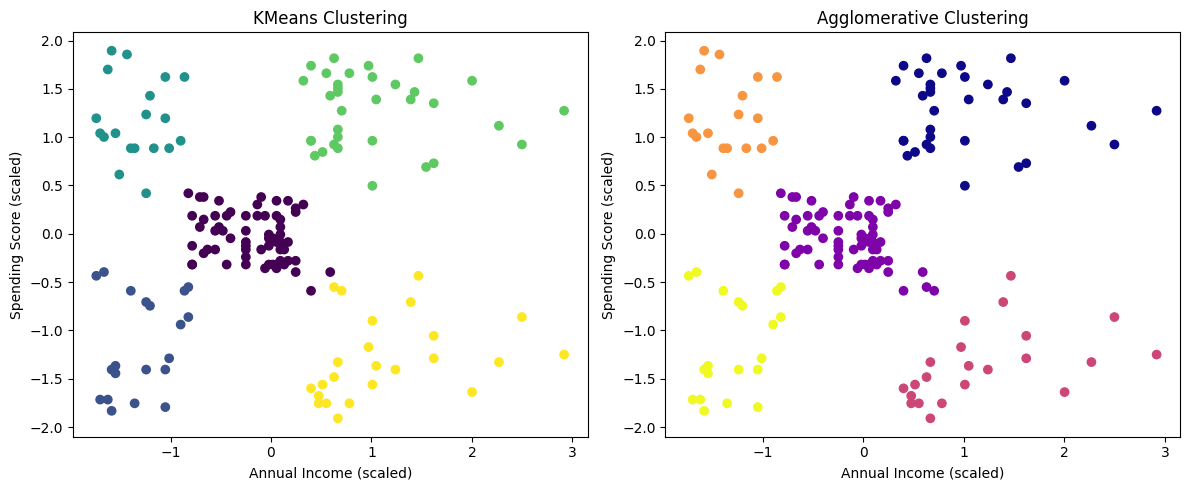

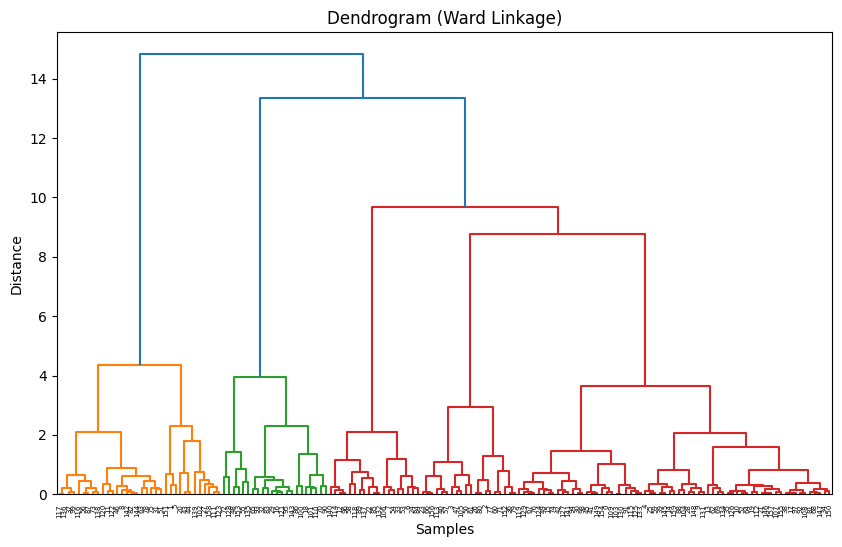

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('Mall_Customers.csv')

# a) Data Preprocessing
df.rename(columns={
    'Genre': 'Gender',
    'Annual Income (k$)': 'AnnualIncome',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace=True)

# Encode categorical data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male:1, Female:0

# b) Feature Selection (Spending Score, Annual Income)
features = df[['AnnualIncome', 'SpendingScore']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# c) Train-Test Split (Not common in clustering, but to follow the question)
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

# d) Apply Clustering Algorithms
## 1. KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train)

## 2. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_train)

# e) Evaluate Models using Silhouette Score
kmeans_silhouette = silhouette_score(X_train, kmeans_labels)
agglo_silhouette = silhouette_score(X_train, agglo_labels)

print("Silhouette Score (KMeans):", round(kmeans_silhouette, 3))
print("Silhouette Score (Agglomerative):", round(agglo_silhouette, 3))

# f) Visualize Clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')

plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=agglo_labels, cmap='plasma')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')

plt.tight_layout()
plt.show()

# g) Dendrogram for Agglomerative Clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage(X_train, method='ward'))
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [3]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
df = pd.read_csv('Mall_Customers.csv')

In [9]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
# a) Data Preprocessing
df.rename(columns={
    'Genre': 'Gender',
    'Annual Income (k$)': 'AnnualIncome',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace=True)

In [12]:
# Encode categorical data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male:1, Female:0

In [13]:
# b) Feature Selection (Spending Score, Annual Income)
features = df[['AnnualIncome', 'SpendingScore']]

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [15]:
# c) Train-Test Split (Not common in clustering, but to follow the question)
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

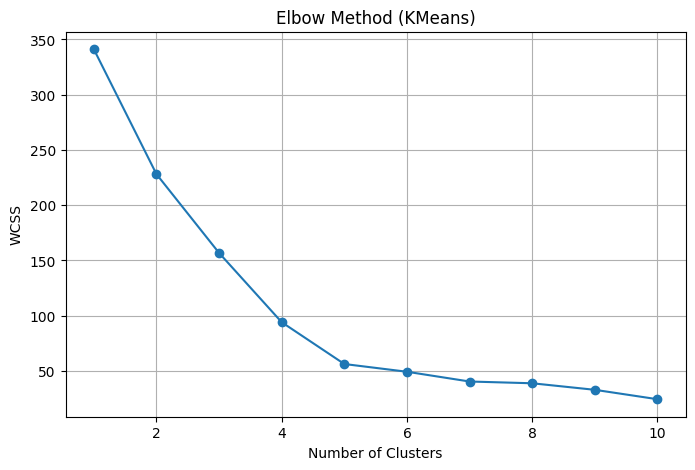

In [40]:
# Elbow Method for KMeans
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method (KMeans)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [16]:
# d) Apply Clustering Algorithms
## 1. KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train)

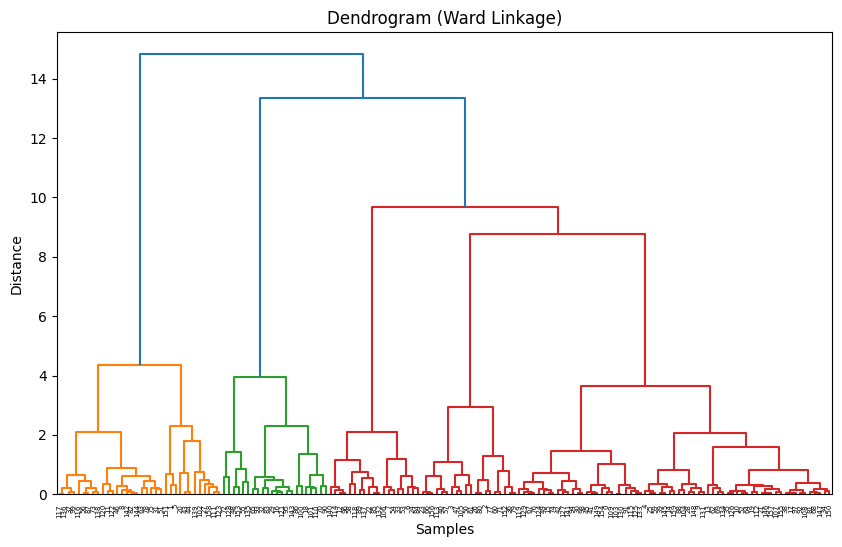

In [41]:
plt.figure(figsize=(10, 6))
dendrogram(linkage(X_train, method='ward'))
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [17]:
## 2. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_train)

In [19]:
# e) Evaluate Models using Silhouette Score
kmeans_silhouette = silhouette_score(X_train, kmeans_labels)
agglo_silhouette = silhouette_score(X_train, agglo_labels)

print("Silhouette Score (KMeans):", round(kmeans_silhouette, 3))
print("Silhouette Score (Agglomerative):", round(agglo_silhouette, 3))

Silhouette Score (KMeans): 0.551
Silhouette Score (Agglomerative): 0.552


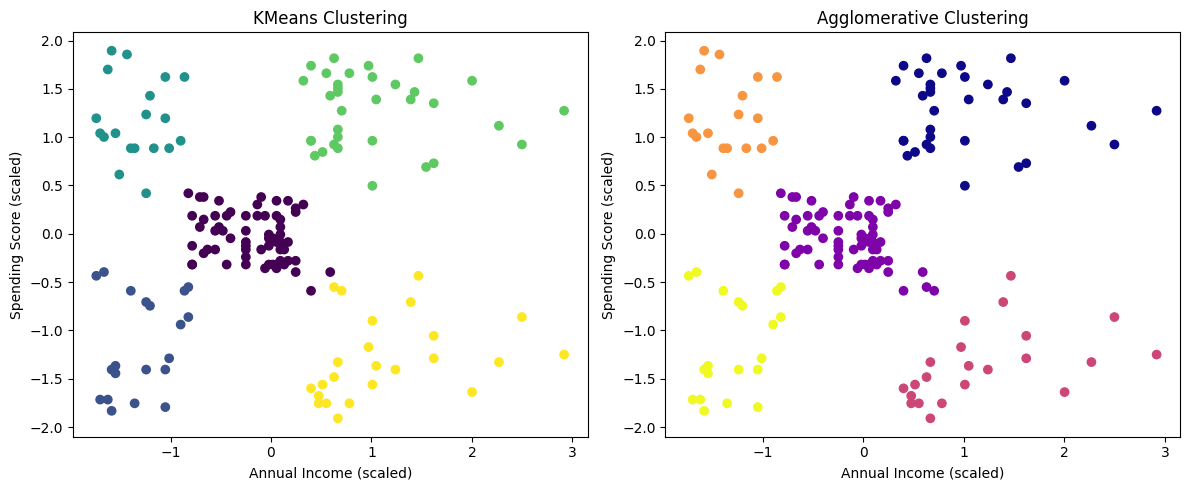

In [21]:
# f) Visualize Clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')

plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=agglo_labels, cmap='plasma')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')

plt.tight_layout()
plt.show()

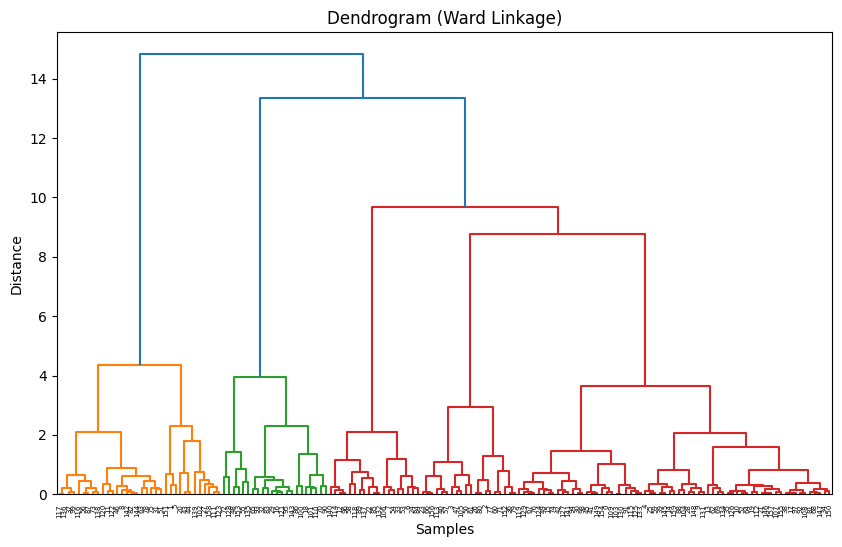

In [22]:
# g) Dendrogram for Agglomerative Clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage(X_train, method='ward'))
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Let's use features: scaled annual income and spending score
X = scaled_features  # Already scaled

# Set up KFold (5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

silhouette_scores = []

for train_index, test_index in kf.split(X):
    X_fold = X[train_index]
    
    # Apply KMeans clustering on each fold
    kmeans = KMeans(n_clusters=5, random_state=42)
    labels = kmeans.fit_predict(X_fold)
    
    # Evaluate using silhouette score (on training fold)
    score = silhouette_score(X_fold, labels)
    silhouette_scores.append(score)

# Print average silhouette score
print("Cross-validated Silhouette Score (KMeans):", round(np.mean(silhouette_scores), 3))


Cross-validated Silhouette Score (KMeans): 0.533


In [28]:
kf.split(X)

<generator object _BaseKFold.split at 0x000001CC9936AF00>

In [39]:

from sklearn.cluster import AgglomerativeClustering

agglo_scores = []

for train_index, test_index in kf.split(X):
    X_fold = X[train_index]
    
    agglo = AgglomerativeClustering(n_clusters=5)
    labels = agglo.fit_predict(X_fold)
    
    score = silhouette_score(X_fold, labels)
    agglo_scores.append(score)
    print(agglo_scores)

print("Cross-validated Silhouette Score (Agglomerative):", round(np.mean(agglo_scores), 3))


[0.5523700957479284]
[0.5523700957479284, 0.556417227046893]
[0.5523700957479284, 0.556417227046893, 0.5558321811763726]
[0.5523700957479284, 0.556417227046893, 0.5558321811763726, 0.5196608040904769]
[0.5523700957479284, 0.556417227046893, 0.5558321811763726, 0.5196608040904769, 0.5434278937380126]
Cross-validated Silhouette Score (Agglomerative): 0.546


In [37]:
train_index

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        15,  16,  17,  18,  19,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  49,  51,  53,  55,  56,  59,  60,  61,  62,
        64,  65,  66,  67,  68,  69,  70,  72,  73,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  89,  90,  91,  93,  94,
        95,  96,  97,  98, 100, 101, 104, 105, 108, 109, 110, 111, 112,
       113, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127,
       128, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 150, 152, 153, 154, 155, 156, 158, 159,
       161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174,
       176, 177, 178, 180, 181, 182, 184, 185, 186, 187, 189, 190, 191,
       194, 195, 197, 198])

In [33]:
test_index

array([  1,  14,  20,  21,  37,  48,  50,  52,  54,  57,  58,  63,  71,
        74,  87,  88,  92,  99, 102, 103, 106, 107, 116, 121, 129, 130,
       134, 149, 151, 157, 160, 167, 175, 179, 183, 188, 192, 193, 196,
       199])

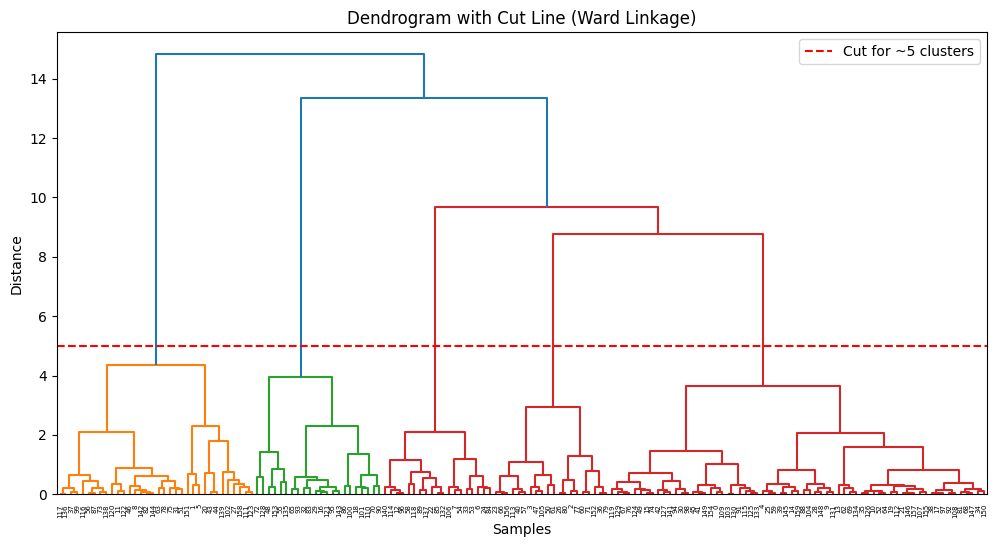

In [44]:
linked = linkage(X_train, method='ward')

# Plot dendrogram with a horizontal cut line
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.axhline(y=5, color='r', linestyle='--', label='Cut for ~5 clusters')
plt.title('Dendrogram with Cut Line (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.legend()
plt.show()